# MATH 360 Introduction to Mathematical Modelling

### Modelling Assignment 3: Monte Carlo Methods

Discussed with Anthony Mirarchi, Nara Sheen, Umay Gokturk, Tiffany Wu

#### Preliminaries
Many of the models we have discussed or simulated require input parameters, which are often measured quantities. Measured quantities are often said to have a level of uncertainty associated with them. Even if the measurement is *perfectly* done, there still exists an uncertainty with the result (e.g., perhaps the way we are measuring the quantity is inaccurate or the tools we are using to measure have uncertainty associated with them). The level of uncertainty can influence the output of any model we contruct. 

We know our measurements will have some uncertainty associated with them, and we want to determine how this uncertainty affects the output of the model.  The general strategy for determining how uncertainty influences the model is through the Monte Carlo scheme below.  

Let $x$ be the measured quantity with uncertainty $c$; i.e., $x \pm c$. 

1. Define a random variable $\hat{x} = x + \varepsilon$, where $\varepsilon$ is a normally distributed random variable with mean $0$ and standard deviation $c$. 
2. Solve the model with $\hat{x}$.
3. Repeat until the desired number of simulations is met. 
4. Visualize results. 

### Part 1: Construct the Model - Monte Carlo Methods

Suppose you own a pumpkin patch and know the following information about daily income and costs for the month of October:
- the quantity of pumpkins that customers buy is equal to $\beta_1$, where $\beta_1 = 3$
- the price of each pumpkin is determined by weight and is equal to $\beta_2$, where $\beta_2 = 5 \pm 0.5$
- the number of customers on a given day is equal to $\beta_3$, where $\beta_3 = 25 \pm 10$
- the costs associated with growing pumpkins is equal to $-\beta_4 t $, where $\beta_4 = 2.35 \pm 0.65$
- the maintenance costs associated with maintaining the equipment needed to grow the pumpkins is equal to $- \beta_5t^{0.5}$, where $\beta_5 = 1.75 \pm 0.85$ (i.e., as the usage increases over the month of October, we have more maintenance costs to maintain the equipment)
- the pumpkin patch has a coffee and hot apple cider stand that during the month of October the previous year generated a profit equal to $\beta_6 t^2$, where $\beta _6 = 3.5 \pm 1.2$ 

Note $t$ here is time, which is measured in days, with $t=0$ corresponding to October $1$ and $t=30$ corresponding to October $31$. 

#### Tasks
1. Use the fact Net Income = Total Revenue - Total Costs to construct a formula for the net income on day $t$. 
2. Use the Monte Carlo Uncertainty Analysis process described in Preliminaries to determine how the uncertainty in $\beta_1,\beta_2,\beta_3,\beta_4,\beta_5,$ and $\beta_6$ affects the Net Income on day $t$ model from Task $1$. Each sample of the random variables determines a Net Income on day $t$ function.  Plot this Net Income function for each sample to show the variation. 
   
   a.  First consider a model where all of the uncertainties for the $\beta$s are included. 
   
   b.  Next consider a model or model(s) of your choosing where only some of the uncertainties are included.  Be sure to justify why you chose those specific $\beta$(s) to have uncertainty included.
4. Determine the probability density function of the Net Income on October 31 and determine the probability that you make a profit on Halloween. 


Present your work in a Jupyter notebook that includes:
- Problem statement
- Variable and parameter definitions 
- Assumptions and constraints
- Monte Carlo implementation
- Probability density functions as appropriate.

Students work individually and submit their work in class.

In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats


print("packages imported")

packages imported


## Problem Statement

Determine the total net income by selling pumpkins throughout the month of October, considering each costs and incomes, as well as the how the uncertainty in each factor affects the net income on day t.

## Variable and parameter definitions

Variables:
* $\hat{\beta_1} = \beta_1 + \varepsilon_1$: the quantity of pumpkins that customers buy
* $\hat{\beta_2} = \beta_2 + \varepsilon_2$: the price of each pumpkin, determined by the weight
* $\hat{\beta_3} = \beta_3 + \varepsilon_3$: the number of customers on a given day
* $\hat{-\beta_4 t} = \beta_4 + \varepsilon_4$: the costs associating growing pumpkins
* $\hat{-\beta_5 t^{0.5}} = \beta_5 + \varepsilon_5$: the maintenance costs associated with maintaining the equipment needed to grow the pumpkins
* $\hat{\beta_6 t^2} = \beta_6 + \varepsilon_6$: the profit made by the previous year
* $\hat{\beta}$: Net income on day $t$
* $t$: time

Parameters:
* $c_1 = 0$: standard deviation of $\hat{\beta_1}$
* $c_2 = 0.5$: standard deviation of $\hat{\beta_2}$
* $c_3 = 10$: standard deviation of $\hat{\beta_3}$
* $c_4 = 0.65$: standard deviation of $\hat{\beta_4}$
* $c_5 = 0.85$: standard deviation of $\hat{\beta_5}$
* $c_6 = 1.2$: standard deviation of $\hat{\beta_6}$
* $x_1 = 3$
* $x_2 = 5$
* $x_3 = 25$
* $x_4 = 2.35$
* $x_5 = 1.75$
* $x_6 = 3.5$

## Assumptions and constraints

* Random Variable $\varepsilon_1, \varepsilon_2, \varepsilon_3, \varepsilon_4, \varepsilon_5, \varepsilon_6$ are normally distributed
* The mean is always 0
* 1 $\leq t \leq$ 30

## Build Solution

**Task 1 Formula for net income on day $t$**

Total revenue consists product of the number of customers, quatity that customer buy and price of each pumpkin. Total cost consists the costs associated with growing pumpkins and maintenance cost. 

$$\hat{\beta} = (\hat{\beta_1} \times \hat{\beta_2} \times \hat{\beta_3}) - \hat{\beta_4}t - \hat{\beta_5}t^{0.5} + \hat{\beta_6}t^2$$

**Task 2 Monte Carlo Simulation**

a. Consider a model with all of the uncertainties included. 

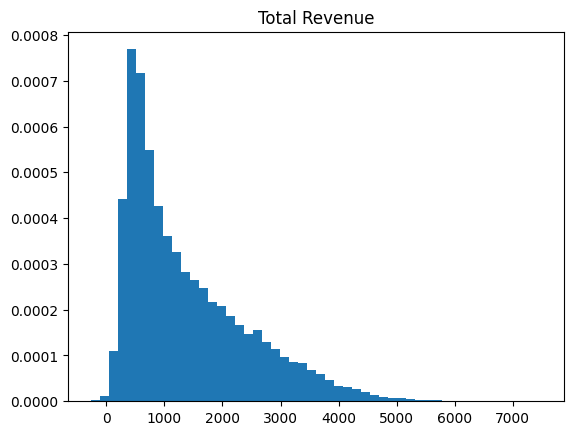

In [3]:
# number of Monte Carlo simulation
N = 20000

# October 31
t = np.linspace(0, 30, N)

# Uncertanties
c1 = 0; c2 = 0.5; c3 = 10;c4 = 0.65; c5 = 0.85; c6 = 1.2
x1 = 3; x2 = 5; x3 = 25; x4 = 2.35; x5 = 1.75; x6 = 3.5


ep1 = np.random.normal(loc=0, scale=c1, size=N)
ep2 = np.random.normal(loc=0, scale=c2, size=N)
ep3 = np.random.normal(loc=0, scale=c3, size=N)
ep4 = np.random.normal(loc=0, scale=c4, size=N)
ep5 = np.random.normal(loc=0, scale=c5, size=N)
ep6 = np.random.normal(loc=0, scale=c6, size=N)
beta = (x1+ep1)*(x2+ep2)*(x3+ep3) - (x4+ep4)*t - (x5+ep5)*t**(0.5) + (x6+ep6)*t**2

plt.hist(beta, bins=50, density = True)
plt.title("Total Revenue")
plt.show()

In [4]:
# mean and standard deviation of daily net income

mu = np.mean(beta)
sigma2 = np.std(beta)
print(f"Mean: {mu}, Standard Deviation: {sigma2}")

Mean: 1380.966653191376, Standard Deviation: 1041.6065713426428


b. Now we choose $\hat{\beta_2}$ as a constant instead of making it as a random variable. This means that $\varepsilon_2$ will be equal to 0.
I chose to make $\hat{\beta_2}$ as a constant because I thought that the price of pumpkins can be fixed by the seller. 

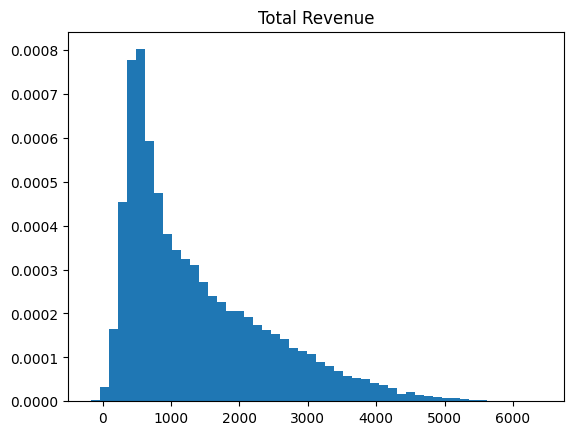

In [10]:
# number of Monte Carlo simulation
N = 20000

# October 31
t = np.linspace(0, 30, N)

# Uncertanties
c1 = 0; c2 = 0.5; c3 = 10;c4 = 0.65; c5 = 0.85; c6 = 1.2
x1 = 3; x2 = 5; x3 = 25; x4 = 2.35; x5 = 1.75; x6 = 3.5


ep1 = np.random.normal(loc=0, scale=c1, size=N)
# ep2 = np.random.normal(loc=0, scale=c2, size=N)
ep3 = np.random.normal(loc=0, scale=c3, size=N)
ep4 = np.random.normal(loc=0, scale=c4, size=N)
ep5 = np.random.normal(loc=0, scale=c5, size=N)
ep6 = np.random.normal(loc=0, scale=c6, size=N)
beta = (x1+ep1)*(x2)*(x3+ep3) - (x4+ep4)*t - (x5+ep5)*t**(0.5) + (x6+ep6)*t**2

plt.hist(beta, bins=50, density = True)
plt.title("Total Revenue")
plt.show()

In [12]:
# mean and standard deviation of daily net income with beta2 fixed

mu_new = np.mean(beta)
sigma2_new = np.std(beta)
print(f"Mean: {mu_new}, Standard Deviation: {sigma2_new}")

Mean: 1385.4223893867043, Standard Deviation: 1048.1773222748684


**Task 3 Determine the probability density function**

We are looking for the distribution of net income at October 31st. This means that we need to fix $t = 30$. 
We use Kernel Density Function to estimate the probability. 

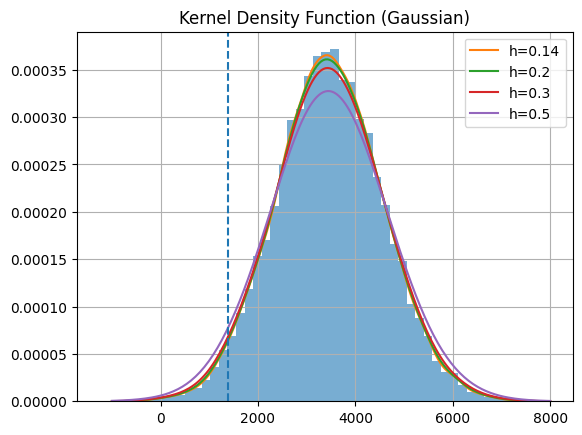

In [8]:
# number of Monte Carlo simulation
N = 20000

# October 31
t = 30

# Uncertanties
c1 = 0; c2 = 0.5; c3 = 10;c4 = 0.65; c5 = 0.85; c6 = 1.2
x1 = 3; x2 = 5; x3 = 25; x4 = 2.35; x5 = 1.75; x6 = 3.5

# Distributions
ep1 = np.random.normal(loc=0, scale=c1, size=N)
ep2 = np.random.normal(loc=0, scale=c2, size=N)
ep3 = np.random.normal(loc=0, scale=c3, size=N)
ep4 = np.random.normal(loc=0, scale=c4, size=N)
ep5 = np.random.normal(loc=0, scale=c5, size=N)
ep6 = np.random.normal(loc=0, scale=c6, size=N)

# beta's
beta1 = x1+ep1
beta2 = x2+ep2
beta3 = x3+ep3
beta4 = x4+ep4
beta5 = x5+ep5
beta6 = x6+ep6

# Net income
beta = beta1*beta2*beta3 - beta4*t - beta5*t**(0.5) + beta6*t**2

plt.hist(beta, bins = 50, density = True, alpha=0.6)

kde1 = stats.gaussian_kde(beta)
kde2 = stats.gaussian_kde(beta, bw_method=0.2)
kde3 = stats.gaussian_kde(beta, bw_method=0.3)
kde4 = stats.gaussian_kde(beta, bw_method=0.5)

x = np.linspace(-1000, 8000, 200)

plt.plot(x, kde1(x), label='h={:.2f}'.format(kde1.factor))
plt.plot(x, kde2(x), label = 'h=0.2')
plt.plot(x, kde3(x), label = 'h=0.3')
plt.plot(x, kde4(x), label = 'h=0.5')
plt.title("Kernel Density Function (Gaussian)"), plt.legend(), plt.grid(True)
plt.axvline(x=mu, linestyle = "--")
plt.show()

## Analysis

Since kde1 is the most accurate Kernel Density Estimation, we can use kde1 to find the probability to make a profit on October 31st

In [49]:
# Probability that they make a profit on October 31st
prob = kde1.integrate_box_1d(0, 8000)
# Probability that they make more profit than the average profit
prob_more_mu = kde1.integrate_box_1d(mu, 8000)
print(prob, prob_more_mu)

0.9991599016862076 0.9702828936977099


We have a **99.9%** probability of making profit on October 31st. Also the probability that they will make higher profit than the average profit, $\mu$, is approximately **97%**. Due to this model, the strong probability of making profit on October 31st indicates high chance of accomplishing the goal profit. Furthermore, the probabibility of making profit more than its average profit is quite high. This means that we can expect to have a strong sales on October 31st, Halloween. 

Removing the uncertainty in $\hat{\beta_2}$, the price of a pumpkin, does not change the distribution much. This means that the uncertainty of the cost of a pumpkin does not affect the total revenue remarkably. We can expect this to happen because $\hat{\beta_2}$ is not associated with the variable time, $t$.

## Results

This model gives the numeric value on the probability of making a total net profit, by examining the income of a pumpkin patch. The equation is given by:
$$Revenue = Income - Cost$$
Analysis was done by first plotting the histogram of the distribution, by using Monte Carlo simulation. This was followed by plotting Kernel Distribution Function to estimate the distribution on Halloween. This was done by setting $t = 30$. Removing uncertainties on certain variable was done as well to examine if the variable affect the total revenue. I further more studied if the probability of revenue on Halloween would be higher than usual days. These studies were concluded with a probability of 99.9% of making a net profit on Halloween and 97% or making more profit than the average profit of the month. 

### Part 2: Collaborate, Refine, and Simulate the Model

After submitting your work in Part 1 in class, work in groups and compare your results. Collaborate, refine, and simulate your models.

Present your work in a Jupyter notebook including all parts in Part $1$ along with:
- Numerical solutions
- Visualizations of solutions
- Analysis and discussion of the results.

In addition, include a clearly labelled section at the end of your Jupyter notebook, where you discuss the improvements you have made and/or what steps have been taken to refine the model.

Students work collaboratively but submit their own final Jupyter notebook individually. Include names of all students with whom you collaborated in Part $2$.

#### Part 2 - Reflection 
This reflection should have two parts: 

1) Explain in a list of bullet points the changes you have made to your model in the version you are submitting and why you chose to make those changes. 

2) In a paragraph or two reflect on the following prompts:
    - What part of the six modelling steps was the most challenging for you?
    - What helped you to identify any mistakes/misconceptions in your original model?
    - Do you think these techniques would be helpful for identifying mistakes/misconceptions in future assignments? Why or why not? 


    

1. 
* Gave more specific information about my model with much explanation what I am doing
* I was able to plot the Monte Carlo Distribution with no for loops. 
* Plotted 4 different Kernel Density Functions with different $h$ values. This was done to find out which kernel denstiy function is the most accurate to the Monte Carlo Distribution on October 31st. 
* Added a vertical line in the plot, to see where the average net income is at, comapared to the net income on October 31st.

2. 
Building up the solution was the most challenging part of the six modelling steps. Having an equation was not much difficult, but simulating Monte Carlo simulation in code and plotting the results was the most difficult part. In my previous code, I had a for loop in order to execute the Monte Carlo simulation, but this took quite long and was unecessary. Additionally, coming up with variables and parameters was difficult because we were focusing on the error, $\varepsilon$, where $\varepsilon$ is normally distributed, hence, we would need mean and standard deviation. 